Alumno: Edwin Gustavo Mallqui Hernandez

correo: gustavoxtruni@gmail.com


# CAPITULO 1
Introduccion
________________________________________________________________________________________________________________________________
Ejemplo de salario vs años como data scientist

## Datos

In [1]:
#son los datos de salarios y años de experiencia
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [2]:
#es un tipo lista
type(salaries_and_tenures)

list

## Gráfico
Realizamos un grafico de dispersion entre los salarios y los años

In [3]:
#extraemos de la lista los salarios
salario=[]
for i in range(len(salaries_and_tenures)):
    salario.append(salaries_and_tenures[i][0])


In [4]:
#extraemos de la lista los años
anios=[]
for i in range(len(salaries_and_tenures)):
    anios.append(salaries_and_tenures[i][1])

In [5]:
#llamamos a la libreria matplotlib para realizar un grafico de dispersion
from matplotlib import pyplot as plt

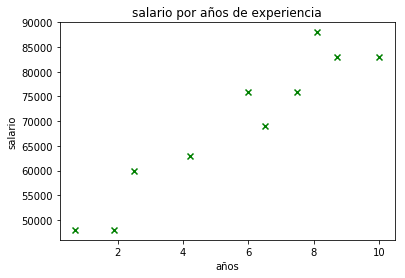

In [6]:
# create a line chart, years on x-axis, gdp on y-axis
plt.scatter(anios,salario,color='green', marker='x')

# add a title
plt.title("salario por años de experiencia")
# add a label to the y-axis
plt.ylabel("salario")
plt.xlabel("años")
plt.show()

## CALCULO DE SALARIO PROMEDIO POR CATEGORIA DE AÑOS

In [7]:
#llamamos a la libreria collections para asignar listas vacias por default
from collections import defaultdict

In [8]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)


In [9]:
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [10]:
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

## De la siguiente manera categorizamos los años de experiencia

In [11]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"


In [12]:
# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [13]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [14]:
# keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}


## resultado final

In [15]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

# CAPITULO 3
Visualiacion de datos (Scatterplots)
________________________________________________________________________________________________________________________________
Ejemplo: la relacion entre el numero de amistades y la cantidad de minutos de dialogo en el site.

## Datos

In [16]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

simplemente graficando el numero de amistades vs la cantidad de minutos conversando

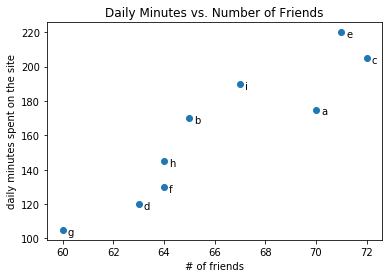

In [17]:
plt.scatter(friends, minutes)
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')
    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()


ahora en el siguiente ejemplo mostramos dos variables que estan en las mismas unidades pero mostradas en ejes no comparables

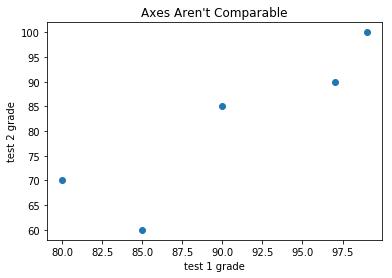

In [18]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()


para hacerlas comparables se tendrian que iniciar y finalizar ambos ejes en los mismos valores

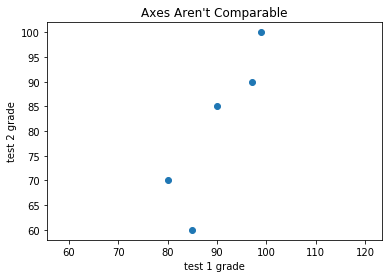

In [19]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

# CAPITULO 10
trabajando con datos
________________________________________________________________________________________________________________________________
Explorando datos unidimensionales

## creando funciones

In [20]:
import math
from collections import Counter

In [21]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))

def standard_deviation(x):
    return math.sqrt(variance(x))

def mean(x):
    return sum(x) / len(x)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) /2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
                    
    return mid_z

## Ejemplo de una dimension: datos segun una distribucion

In [22]:
import random

random.seed(0)



In [23]:
# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]



In [24]:
# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

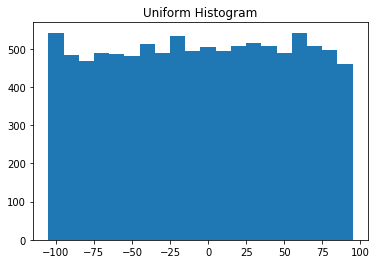

In [25]:
plot_histogram(uniform, 10, "Uniform Histogram")


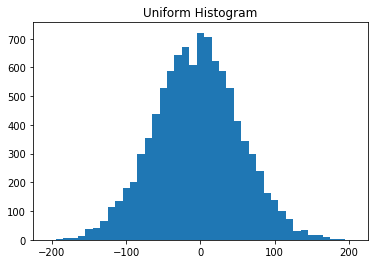

In [26]:
plot_histogram(normal, 10, "Uniform Histogram")

## Ejemplo de dos dimensiones: 

In [27]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]


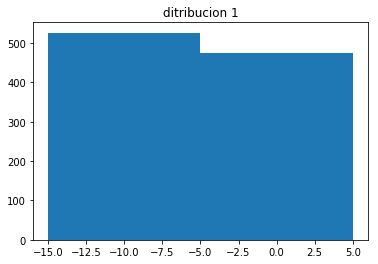

In [28]:
plot_histogram(ys1, 10, "ditribucion 1")


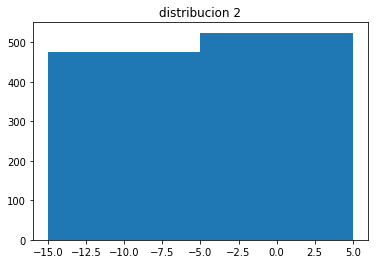

In [29]:
plot_histogram(ys2, 10, "distribucion 2")

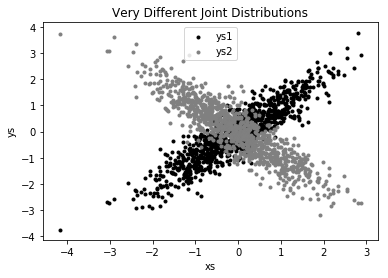

In [30]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()


In [31]:
print (correlation(xs, ys1)) # 0.9
print (correlation(xs, ys2)) # -0.9

0.9010493686379609
-0.8920981526880033


## Ejemplo de muchas dimensiones: 

In [32]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0 # number of elements in first row
    return num_rows, num_cols

def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    _, num_columns = shape(data)
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    return make_matrix(num_columns, num_columns, matrix_entry)

In [33]:
import matplotlib.pyplot as plt
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)
for i in range(num_columns):
    for j in range(num_columns):
        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))
        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")
        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()


NameError: name 'data' is not defined

# CAPITULO 24

________________________________________________________________________________________________________________________________


## Map reduce
Ejemplo de conteo de palabras

In [34]:
def word_count_old(documents):
    """word count not using MapReduce"""
    return Counter(word
                   for document in documents
                   for word in tokenize(document))


In [35]:
def wc_mapper(document):
    """for each word in the document, emit (word,1)"""
    for word in tokenize(document):
        yield (word, 1)


In [36]:
def wc_reducer(word, counts):
    """sum up the counts for a word"""
    yield (word, sum(counts))


In [37]:
def word_count(documents):
    """count the words in the input documents using MapReduce"""
    # place to store grouped values
    collector = defaultdict(list)
    for document in documents:
        for word, count in wc_mapper(document):
            collector[word].append(count)
    return [output
            for word, counts in collector.iteritems()
            for output in wc_reducer(word, counts)]

In [38]:
doc= ["data science", "big data", "science fiction"]

In [39]:
cc=wc_mapper(doc)

In [40]:
wc_reducer("data",2)

<generator object wc_reducer at 0x00DACB70>

mapreduce de manera mas general

In [41]:
def map_reduce(inputs, mapper, reducer):
    """runs MapReduce on the inputs using mapper and reducer"""
    collector = defaultdict(list)
    for input in inputs:
        for key, value in mapper(input):
            collector[key].append(value)
    return [output
            for key, values in collector.iteritems()
            for output in reducer(key,values)]

In [42]:
word_counts = map_reduce(documents, wc_mapper, wc_reducer)


NameError: name 'documents' is not defined

In [43]:
def reduce_values_using(aggregation_fn, key, values):
    """reduces a key-values pair by applying aggregation_fn to the values"""
    yield (key, aggregation_fn(values))

def values_reducer(aggregation_fn):
    """turns a function (values -> output) into a reducer
    that maps (key, values) -> (key, output)"""
    return partial(reduce_values_using, aggregation_fn)


In [44]:
from functools import partial


In [45]:
sum_reducer = values_reducer(sum)
max_reducer = values_reducer(max)
min_reducer = values_reducer(min)
count_distinct_reducer = values_reducer(lambda values: len(set(values)))

## Example: Analyzing Status Updates

In [46]:
import datetime

In [47]:
status_update={"id": 1,
                "username" : "joelgrus",
                "text" : "Is anyone interested in a data science book?",
                "created_at" : datetime.datetime(2013, 12, 21, 11, 47, 0),
                "liked_by" : ["data_guy", "data_gal", "mike"] }


In [48]:
def data_science_day_mapper(status_update):
    """yields (day_of_week, 1) if status_update contains "data science" """
    if "data science" in status_update["text"].lower():
        day_of_week = status_update["created_at"].weekday()
        yield (day_of_week, 1)


In [49]:
data_science_days = map_reduce(status_updates,
                               data_science_day_mapper,
                               sum_reducer)


NameError: name 'status_updates' is not defined